In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Assignment' requirements:
1. Read the documentation and familiarize yourself with the dataset, then write a python notebook which plots line graphs of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.

2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015. (Based on the graph, do you think extreme weather is getting more frequent in 2015?)

3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.

4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.


In [228]:
df= pd.read_csv('./assets/climte_record.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [230]:
# check null data
df.isnull().values.any()

False

In [231]:
df.shape

(165085, 4)

In [234]:
# check available date
(df['Date'].max(), df['Date'].min())

('2015-12-31', '2005-01-01')

## Clear the leap day

In [243]:
# manipulate and extract it into day and month columns
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df.head()

,ID,Date,Element,Data_Value,Month,Day
0,USW00094889,2014-11-12,TMAX,22,11,12
1,USC00208972,2009-04-29,TMIN,56,4,29
2,USC00200032,2008-05-26,TMAX,278,5,26
3,USC00205563,2005-11-11,TMAX,139,11,11
4,USC00200230,2014-02-27,TMAX,-106,2,27


## Devide datasets into two
1. Decade data from 2005 - 2014
2. Datasets in 2015

In [245]:
decade = df[(df['Date'] >= '2005-01-01') & (df['Date'] < '2015-01-01')]
year_2015 = df[df['Date'] >= '2015-01-01']
(decade.shape, year_2015.shape)

((151328, 6), (13757, 6))

## Group the data to the max and min by date for decade and year_2015

In [258]:
# remove leap day
leap_day_index = decade[(decade['Month'] == 2) & (decade['Day'] == 29)].index
decade = decade.drop(leap_day_index)

In [285]:
group_max_decade = decade.groupby(['Month', 'Day']).max().reset_index()
group_min_decade = decade.groupby(['Month', 'Day']).min().reset_index()
year_2015_max = year_2015.groupby(['Month', 'Day']).max().reset_index()
year_2015_min = year_2015.groupby(['Month', 'Day']).min().reset_index()
# get the record of year 2015 higher and lower than the decade
record_high = year_2015_max[year_2015_max['Data_Value'] > group_max_decade['Data_Value']]
record_low = year_2015_min[year_2015_min['Data_Value'] < group_min_decade['Data_Value']]

## Plot data

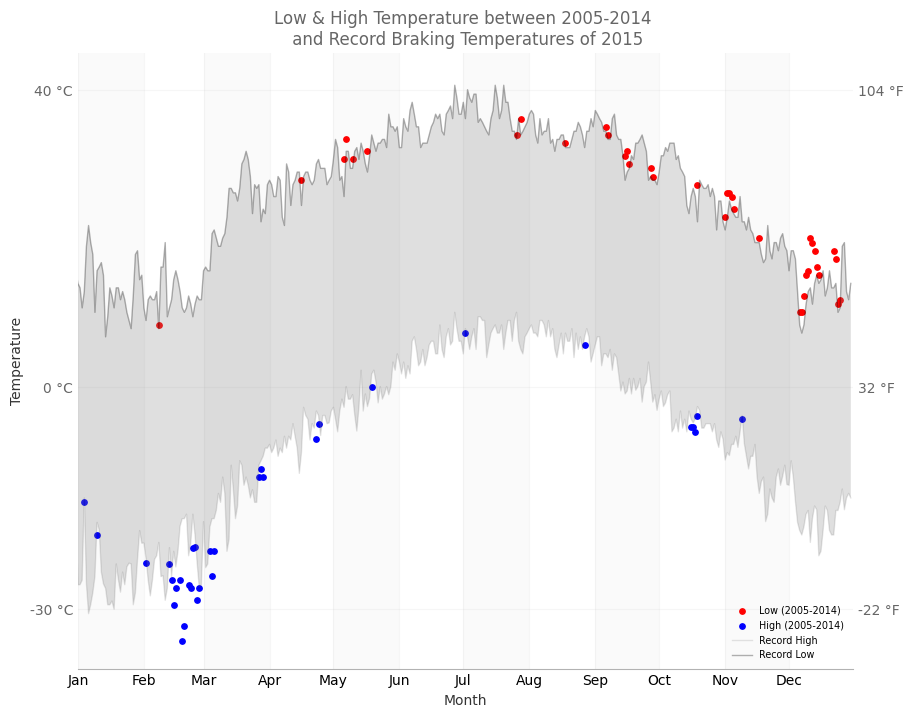

In [298]:
plt.figure(figsize=(10, 8))
# create 2 axes
ax1 = plt.gca()
ax2 = ax1.twinx() 

# scatter higher_record and lower_record
plt.scatter(record_high.index, record_high['Data_Value'], c='r', s=15)
plt.scatter(record_low.index, record_low['Data_Value'], c='b', s=15)

# plot the min and max of temparature 
ax2.plot(group_min_decade['Data_Value'], '-', color = 'k', alpha = 0.1, linewidth= 1)
ax2.plot(group_max_decade['Data_Value'], '-', color = 'k', alpha = 0.3, linewidth= 1)
ax2.fill_between(group_min_decade.index, group_min_decade['Data_Value'], group_max_decade['Data_Value'], facecolor='gray', alpha=0.25)

# x ticks
xticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax2.set_xlim(1, 365)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks_labels, alpha= 0.6)
# ax1.set_xticklabels(xticks_labels, alpha=0.6)
ax2.set_title('Low & High Temperature between 2005-2014 \n and Record Braking Temperatures of 2015', alpha =0.6)

# Set y tick Labels
axlim = ax1.set_ylim(-380,450)
yticks = pd.Series([-300,0,400])
ax1.set_yticks(yticks)
# yticks = (ax.get_yticks() / 10).astype(int)
ylabels = pd.Series(yticks/10).astype(int).astype(str) + ' °C'
ax1.set_yticklabels(ylabels, alpha = 0.6)

# Secondary y-axis labels
#Convert to fahrenheit from celcius
ax2.set_ylim(axlim)
ax2.set_yticks(yticks)
yticks_ax2 = (yticks/10 *  (9/5) + 32).astype(int)
ylabels_ax2 = pd.Series(yticks_ax2).astype(int).astype(str) + ' °F'
ax2.set_yticklabels(ylabels_ax2, alpha = 0.6)

# Shaded Gray background
start = pd.Series(xticks).iloc[::2]
end = pd.Series(xticks).iloc[1::2]
for s, e in zip(start, end):
    ax1.axvspan(s,e, alpha=0.02, color='k', linewidth = 0)

ax1.grid(True, alpha = 0.1)

# invisible Frame
for spine in ax2.spines:
    ax2.spines[spine].set_visible(False)
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)
    
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_alpha(0.3)

# Removing Ticks
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis=u'both', which=u'both',length=0)

# Labels
ax1.set_xlabel('Month', alpha = 0.8)
ax1.set_ylabel('Temperature' , alpha = 0.8)

# legend
leg = ax2.legend(loc=4,labels = ['Low (2005-2014)','High (2005-2014)','Record High','Record Low'], frameon = False, fontsize = 'x-small')
plt.show()